In [103]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import XGBClassifier

import plotly.express as px

from sklearn import metrics
from sklearn.metrics  import accuracy_score
from sklearn.linear_model import LogisticRegression

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

In [104]:
# reading the data
train_df= pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


### Data Exploring

In [105]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [106]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [107]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [108]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [109]:
test_df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [110]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [111]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [112]:
# Data Consest Of?
train_df.shape

(891, 12)

In [113]:
test_df.shape

(418, 11)

In [114]:
print("num of rows & columns of training df are  -> ",train_df.shape[0],train_df.shape[1])
print("num of  rows & columns  of test df are  -> ",test_df.shape[0],test_df.shape[1])

num of rows & columns of training df are  ->  891 12
num of  rows & columns  of test df are  ->  418 11


In [115]:
train_df.count() 

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [116]:
test_df.count() 

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [117]:
# Data Types
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [118]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [120]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [121]:
train_df.Embarked.unique()         

array(['S', 'C', 'Q', nan], dtype=object)

In [122]:
train_df.Cabin.unique()         

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [123]:
# the relation between class and safety
train_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Data Processing

In [124]:
train_df.duplicated().sum()

0

In [125]:
test_df.duplicated().sum()

0

In [126]:
train_df.dropna(inplace=True)

In [127]:
test_df.dropna(inplace=True)

In [128]:
train_df.shape

(183, 12)

In [129]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [130]:
train_df['Survived'].value_counts(1).round(2)*100

1    67.0
0    33.0
Name: Survived, dtype: float64

In [131]:
train_df['Pclass'][train_df['Survived']==1].value_counts()

1    106
2     12
3      5
Name: Pclass, dtype: int64

In [132]:
train_df['Pclass'][train_df['Survived']== 0].value_counts()

1    52
3     5
2     3
Name: Pclass, dtype: int64

In [133]:
train_df[train_df['Sex']=='male']['Survived'].sum()

41

In [134]:
train_df[train_df['Sex']=='female']['Survived'].sum()

82

In [135]:
# calculate youth " male "  alive 
train_df[train_df['Sex'] == 'male'][train_df['Age']<30][train_df['Survived']==1].sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\3838564955.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



PassengerId                                                 7283
Survived                                                      16
Pclass                                                        21
Name           Sloper, Mr. William ThompsonGreenfield, Mr. Wi...
Sex            malemalemalemalemalemalemalemalemalemalemalema...
Age                                                       253.92
SibSp                                                          9
Parch                                                         13
Ticket         113788PC 1775923013623008011378123008011765110...
Fare                                                     999.525
Cabin          A6D10 D12F4F2C22 C26F2E50C52A34B49C70D49E8E121...
Embarked                                        SCSSSSCSSCCCSSSC
dtype: object

In [136]:
# calculate youth " female "  alive 

train_df[train_df['Sex'] == 'female'][train_df['Age']<30][train_df['Survived']==1].sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\2173429999.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



PassengerId                                                16285
Survived                                                      34
Pclass                                                        45
Name           Sandstrom, Miss. Marguerite RutNye, Mrs. (Eliz...
Sex            femalefemalefemalefemalefemalefemalefemalefema...
Age                                                        687.0
SibSp                                                         20
Parch                                                         25
Ticket         PP 9549C.A. 29395199501175211377611967PC 17758...
Fare                                                   3164.0042
Cabin          G6F33C23 C25 C27D47C2B49C65C54B57 B59 B63 B66B...
Embarked                      SSSSSCCCCCSSSCCSSCSCSSSCSCCSSCSSSS
dtype: object

In [137]:
# calculate adult " male "  alive 
train_df[train_df['Sex'] == 'male'][train_df['Age']>30][train_df['Survived']==1].sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\4151302076.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



PassengerId                                                13436
Survived                                                      25
Pclass                                                        28
Name           Beesley, Mr. LawrenceBlank, Mr. HenryHoyt, Mr....
Sex            malemalemalemalemalemalemalemalemalemalemalema...
Age                                                       1083.0
SibSp                                                         10
Parch                                                          5
Ticket         2486981122771994311751113760SOTON/O.Q. 3920781...
Fare                                                   2087.6294
Cabin          D56A31C93D35B96 B98E10C104C92E12E25E25B41A20D1...
Embarked                               SCSSSSSCSSSCCSSCCCCSSSSCS
dtype: object

In [138]:
# calculate adult " Female "  alive 
train_df[train_df['Sex'] == 'female'][train_df['Age']>30][train_df['Survived']==1].sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\2669095818.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



PassengerId                                                21060
Survived                                                      45
Pclass                                                        48
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex            femalefemalefemalefemalefemalefemalefemalefema...
Age                                                       1933.5
SibSp                                                         24
Parch                                                         17
Ticket         PC 17599113803113783PC 1757227267PC 17610PC 17...
Fare                                                   4067.9083
Cabin          C85C123C103D33E101B4B80D36D15C83C125C99D7B58 B...
Embarked           CSSCSCCCCSSSSCSCCSCCQSCSCSCSSSCCSCSSSSSSSCSSC
dtype: object

In [139]:
#  caluculate the avg age of males Rounded to improve the accuracy 
MeanOfMale = train_df[train_df["Sex"] == 'male']['Age'].mean()
round(MeanOfMale)

38

In [140]:
#  caluculate the avg age of females Rounded to improve the accuracy 
MeanOfFemale = train_df[train_df["Sex"] == 'female']['Age'].mean()
round(MeanOfFemale)

33

In [141]:
#set & see the FEATURE  and the corr prct to others

correlation_mat = train_df.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

PassengerId  PassengerId    1.000000
             Survived       0.148495
             Pclass        -0.089136
             Age            0.030933
             SibSp         -0.083488
             Parch         -0.051454
             Fare           0.029740
Survived     PassengerId    0.148495
             Survived       1.000000
             Pclass        -0.034542
             Age           -0.254085
             SibSp          0.106346
             Parch          0.023582
             Fare           0.134241
Pclass       PassengerId   -0.089136
             Survived      -0.034542
             Pclass         1.000000
             Age           -0.306514
             SibSp         -0.103592
             Parch          0.047496
             Fare          -0.315235
Age          PassengerId    0.030933
             Survived      -0.254085
             Pclass        -0.306514
             Age            1.000000
             SibSp         -0.156162
             Parch         -0.271271
 

### Classifing the 1st class

In [142]:
# caluculating the males,survived,adult,1st class in the trip
msa_1st=train_df[train_df['Sex'] == 'male'][train_df['Age']>30][train_df['Survived']==1][train_df['Pclass'] ==1].value_counts().sum()
# caluculating the females,survived,adult,1st class in the trip
fsa_1st=train_df[train_df['Sex'] == 'female'][train_df['Age']>30][train_df['Survived']==1][train_df['Pclass'] ==1].value_counts().sum()
# caluculating the males,survived,youth,1st class in the trip
msy_1st=train_df[train_df['Sex'] == 'female'][train_df['Age']<30][train_df['Survived']==1][train_df['Pclass'] ==1].value_counts().sum()
# caluculating the females,survived,youth,1st class in the trip
fsy_1st=train_df[train_df['Sex'] == 'female'][train_df['Age']<30][train_df['Survived']==1][train_df['Pclass'] ==1].value_counts().sum()

print("Males adult Survived => " , msa_1st )
print("Females adult Survived => " , fsa_1st )
print("Males youth Survived => " , msy_1st )
print("Females youth Survived => " , fsy_1st )


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\1263310264.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\1263310264.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\1263310264.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Males adult Survived =>  23
Females adult Survived =>  42
Males youth Survived =>  26
Females youth Survived =>  26


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\1263310264.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



### Classifing the 2st class

In [143]:
# caluculating the males,survived,adult,2nd class in the trip
msa_2st=train_df[train_df['Sex'] == 'male'][train_df['Age']>30][train_df['Survived']==1][train_df['Pclass'] ==2].value_counts().sum()
# caluculating the females,survived,adult,1st class in the trip
fsa_2st=train_df[train_df['Sex'] == 'female'][train_df['Age']>30][train_df['Survived']==1][train_df['Pclass'] ==2].value_counts().sum()
# caluculating the males,survived,youth,1st class in the trip
msy_2st=train_df[train_df['Sex'] == 'female'][train_df['Age']<30][train_df['Survived']==1][train_df['Pclass'] ==2].value_counts().sum()
# caluculating the females,survived,youth,1st class in the trip
fsy_2st=train_df[train_df['Sex'] == 'female'][train_df['Age']<30][train_df['Survived']==1][train_df['Pclass'] ==2].value_counts().sum()

print("Males adult Survived => " , msa_2st )
print("Females adult Survived => " , fsa_2st )
print("Males youth Survived => " , msy_2st )
print("Females youth Survived => " , fsy_2st )


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\1862550357.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\1862550357.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\1862550357.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\1862550357.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Males adult Survived =>  1
Females adult Survived =>  3
Males youth Survived =>  5
Females youth Survived =>  5


### Classifing the 3st class

In [144]:
# caluculating the males,survived,adult,3rd class in the trip
msa_3st=train_df[train_df['Sex'] == 'male'][train_df['Age']>30][train_df['Survived']==1][train_df['Pclass'] ==3].value_counts().sum()
# caluculating the females,survived,adult,1st class in the trip
fsa_3st=train_df[train_df['Sex'] == 'female'][train_df['Age']>30][train_df['Survived']==1][train_df['Pclass'] ==3].value_counts().sum()
# caluculating the males,survived,youth,1st class in the trip
msy_3st=train_df[train_df['Sex'] == 'female'][train_df['Age']<30][train_df['Survived']==1][train_df['Pclass'] ==3].value_counts().sum()
# caluculating the females,survived,youth,1st class in the trip
fsy_3st=train_df[train_df['Sex'] == 'female'][train_df['Age']<30][train_df['Survived']==1][train_df['Pclass'] ==3].value_counts().sum()

print("Males adult Survived => " , msa_3st )
print("Females adult Survived => " , fsa_3st )
print("Males youth Survived => " , msy_3st )
print("Females youth Survived => " , fsy_3st )


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\2876550874.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\2876550874.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\2876550874.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Males adult Survived =>  1
Females adult Survived =>  0
Males youth Survived =>  3
Females youth Survived =>  3


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11648\2876550874.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



### Fillng the empty and nulls with the avg age 

In [145]:
train_df.loc[train_df['Sex']=='male', 'Age'] = train_df[train_df['Sex']=='male']['Age'].fillna(value=MeanOfMale)

In [146]:
train_df.loc[train_df['Sex']=='female', 'Age'] = train_df[train_df['Sex']=='female']['Age'].fillna(value=MeanOfFemale)

In [147]:
train_df.isna().sum()
# Foucus on the age column

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### Fillng the empty and nulls with the avg Fare

In [148]:
train_df['Fare'].head()

1     71.2833
3     53.1000
6     51.8625
10    16.7000
11    26.5500
Name: Fare, dtype: float64

In [149]:
avgFareCust=train_df['Fare'].mean()
round(avgFareCust)

79

In [150]:
round(avgFareCust,2)

78.68

### Data visulaizations

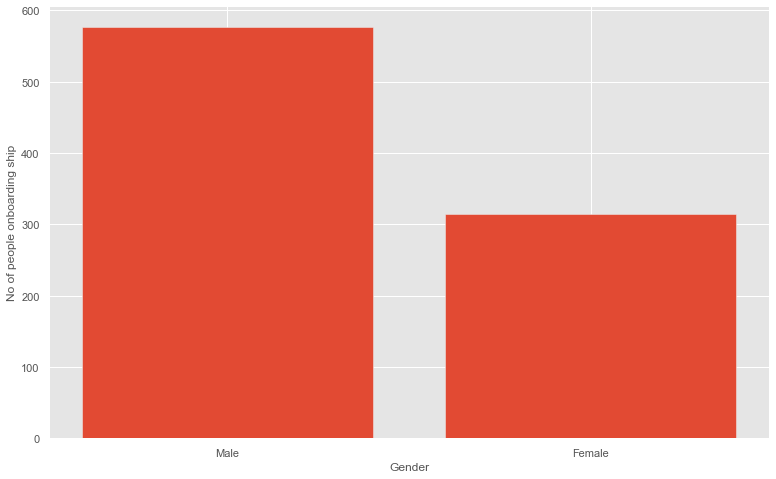

In [151]:
#Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

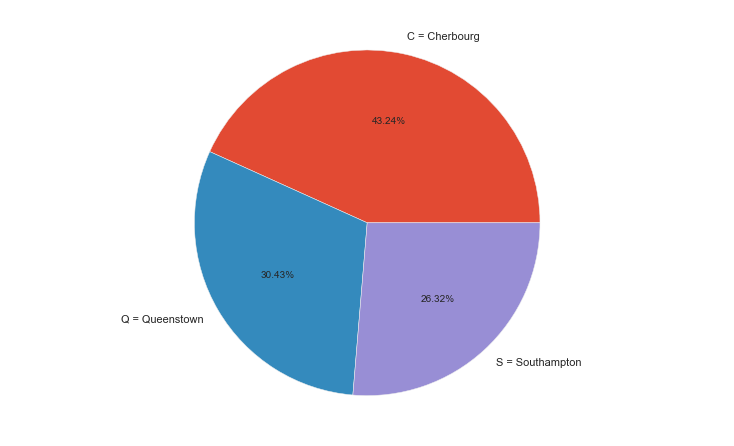

In [152]:
# all ways might be landed in 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

<AxesSubplot:>

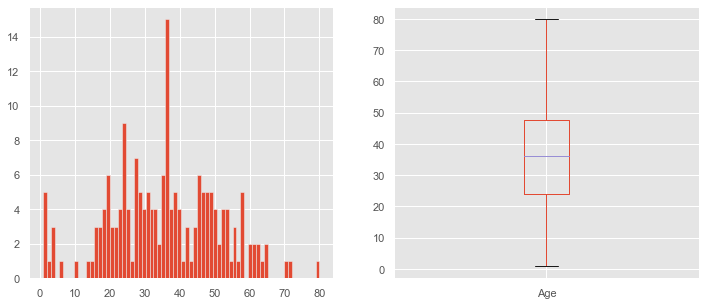

In [153]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_df['Age'].hist(bins=70)

plt.subplot(122)
train_df.boxplot(column='Age', showfliers=False)

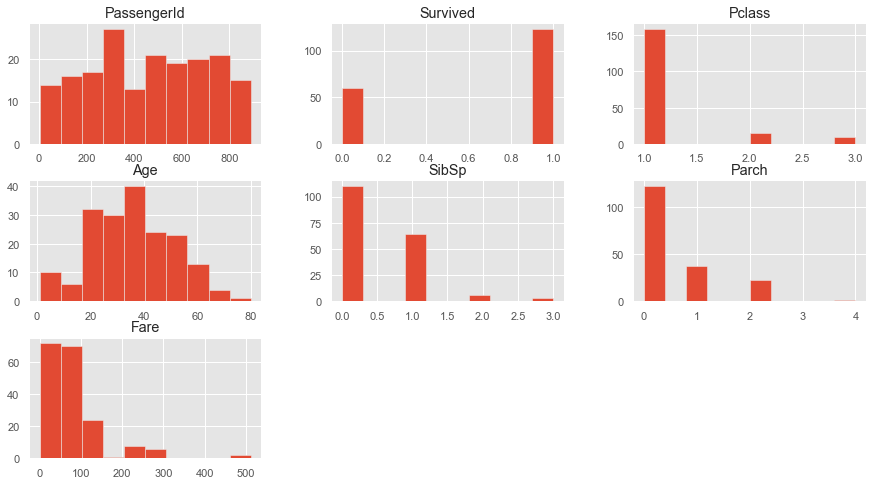

In [154]:
train_df.hist(figsize=(15,8))
plt.show()

In [155]:
corr=train_df.corr()

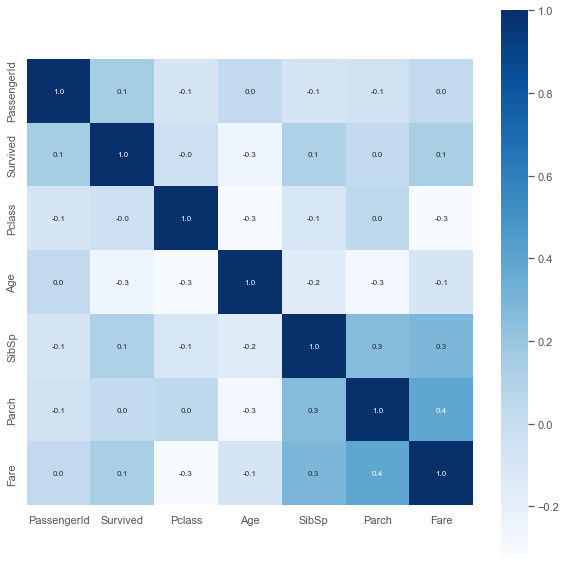

In [156]:
# constructing the heat map to understand the corr 
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True , square =True , fmt = '.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

Sex


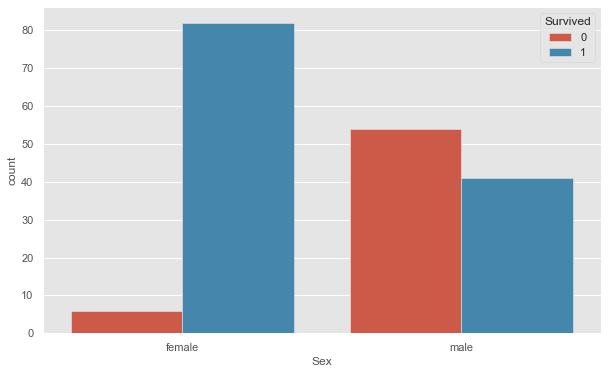


Embarked


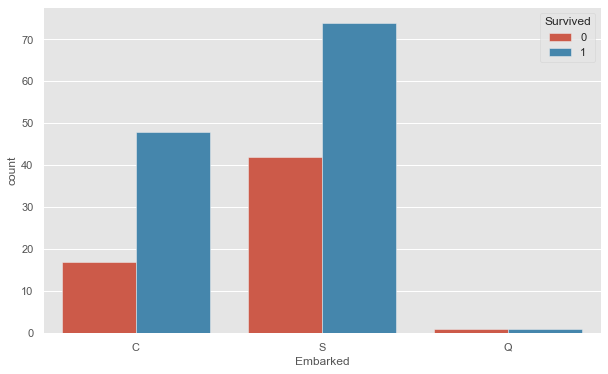


Pclass


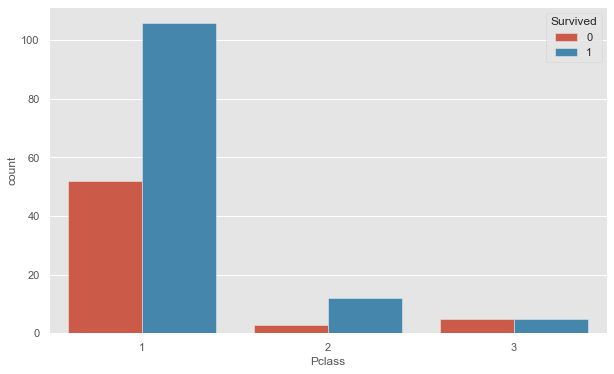


SibSp


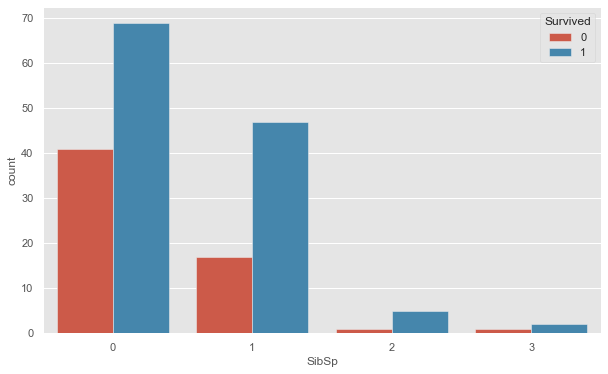


Parch


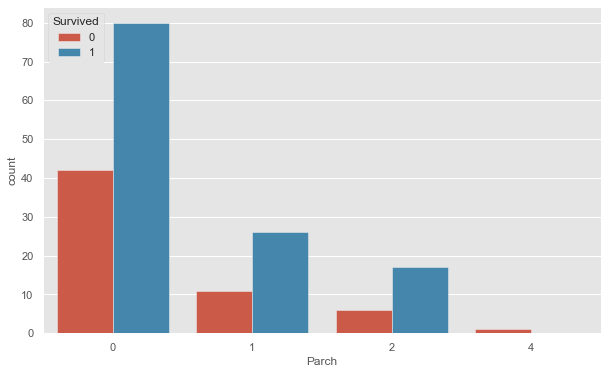

In [157]:
for column_name in ['Sex','Embarked','Pclass', 'SibSp', 'Parch']:
    print(column_name)
    sns.countplot(data=train_df, x=column_name, hue='Survived') 
    plt.show()
    print("")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Pclass', ylabel='Density'>

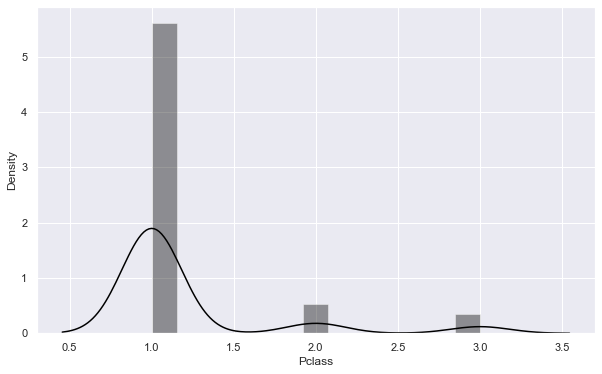

In [158]:
sns.set( style = "darkgrid" )

rs = np.random.RandomState( 10 )
d = rs.normal( size = 50 )

sns.distplot(train_df['Pclass'], kde = True, color = "black")


In [159]:
fig = px.histogram(train_df, x='Pclass', title='Class Classification', nbins=20)
fig.show()

Survived :
 female    82
male      41
Name: Sex, dtype: int64
Dead:
 male      54
female     6
Name: Sex, dtype: int64


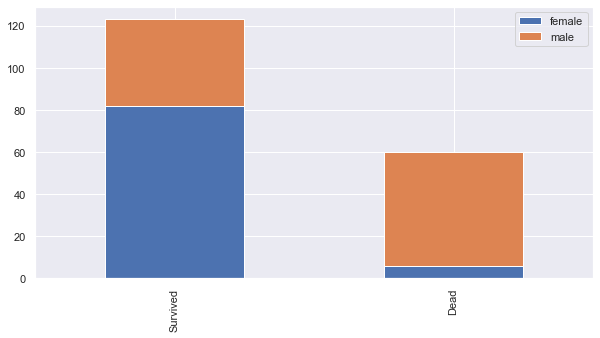

In [160]:
def bar_chart(feature):
    survived = train_df[train_df['Survived']==1][feature].value_counts()
    dead = train_df[train_df['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
bar_chart('Sex')
print("Survived :\n",train_df[train_df['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train_df[train_df['Survived']==0]['Sex'].value_counts())

Survived :
 1    106
2     12
3      5
Name: Pclass, dtype: int64
Dead:
 1    52
3     5
2     3
Name: Pclass, dtype: int64


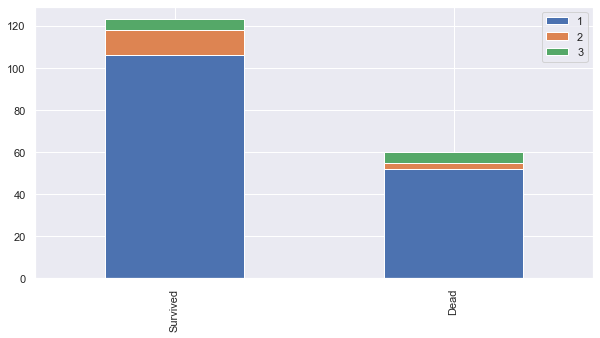

In [161]:
bar_chart('Pclass')
print("Survived :\n",train_df[train_df['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train_df[train_df['Survived']==0]['Pclass'].value_counts())

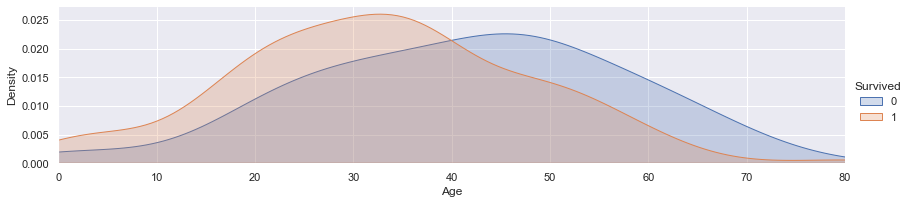

In [162]:
facet = sns.FacetGrid(train_df,hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()

### Extracting Outlaiers

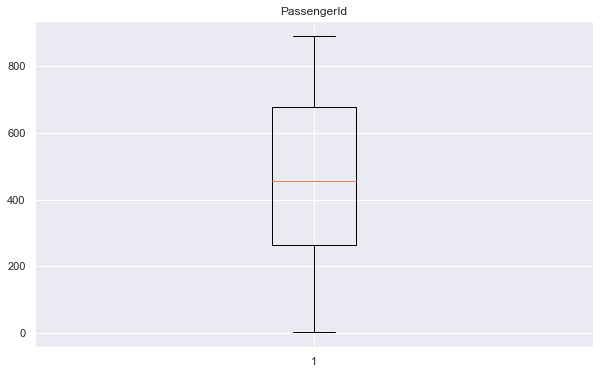

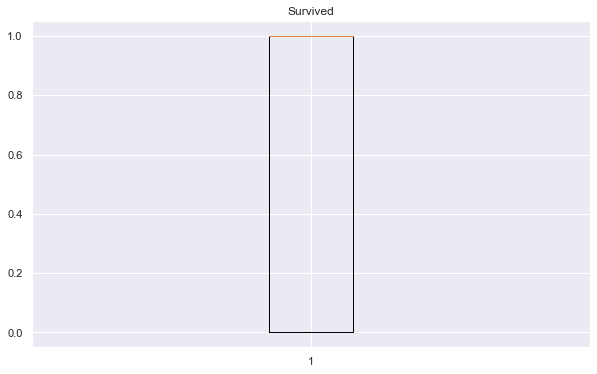

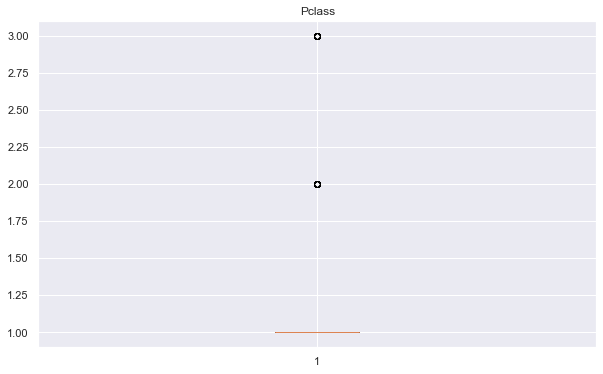

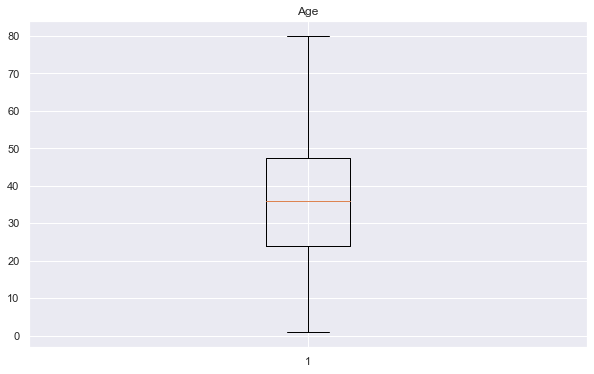

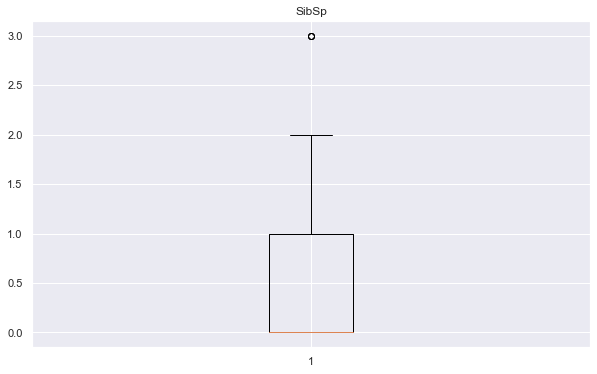

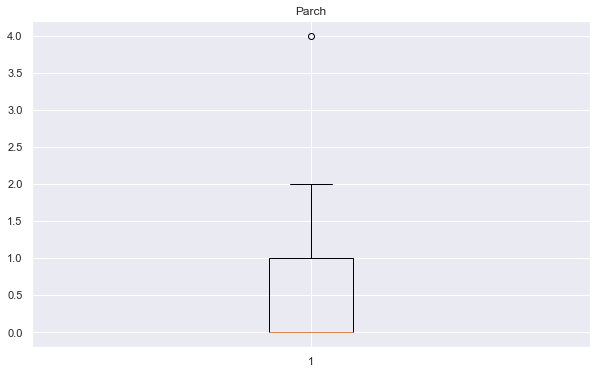

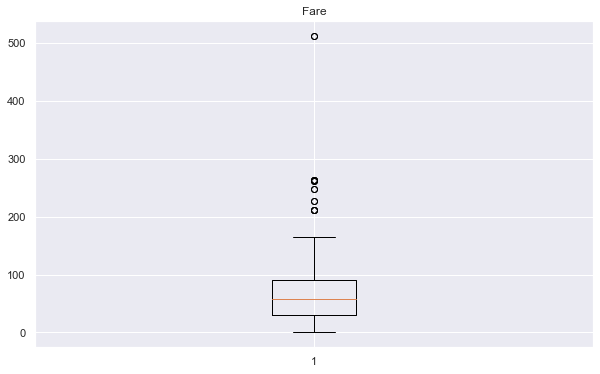

In [163]:
x=[]
for col in train_df.columns:
     if train_df[col].dtype != 'object':
            x.append(col)
for col in x:
    plt.figure()   # plots figure for each iteration
    title_boxplot = f'{col}'
    plt.title( title_boxplot )
    plt.boxplot(train_df[col])

In [164]:
train_df.loc[train_df['Sex']=='male', 'Age'].replace(np.nan,MeanOfMale,inplace=True)

In [165]:
train_df.loc[train_df['Sex']=='female', 'Age'].replace(np.nan,MeanOfFemale,inplace=True)

In [166]:
round(train_df['Age'].mean())

36

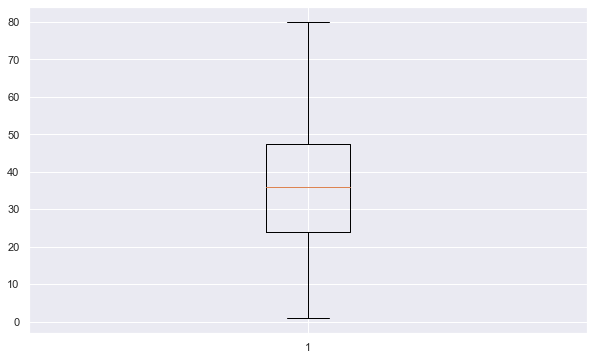

In [167]:
plt.boxplot(train_df['Age'])
plt.show()

In [168]:
train_df['Fare'].median()

57.0

In [169]:
train_df['Fare'].head(10)

1      71.2833
3      53.1000
6      51.8625
10     16.7000
11     26.5500
21     13.0000
23     35.5000
27    263.0000
52     76.7292
54     61.9792
Name: Fare, dtype: float64

## No Nulls

In [170]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Pre-Processing

In [171]:
# dropping un important data
train_df.drop(['PassengerId','Cabin','Ticket','Parch','Name'],axis=1,inplace= True)

In [172]:
train_df.replace({'female':0,'male':1},inplace=True)

In [173]:
train_df = pd.get_dummies(train_df,columns=['Embarked'],prefix='Embarked')

In [174]:
# selecting the main feature
x=train_df.drop(['Survived'],axis=1)
y=train_df['Survived']

In [175]:
x.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S
1,1,0,38.0,1,71.2833,1,0,0
3,1,0,35.0,1,53.1000,0,0,1
6,1,1,54.0,0,51.8625,0,0,1
10,3,0,4.0,1,16.7000,0,0,1
11,1,0,58.0,0,26.5500,0,0,1


In [176]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [178]:
print(x.shape,x_train.shape,x_test.shape)

(183, 8) (146, 8) (37, 8)


### ML Modeling

In [179]:
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked_C,Embarked_Q,Embarked_S
1,1,1,0,38.0,1,71.2833,1,0,0
3,1,1,0,35.0,1,53.1000,0,0,1
6,0,1,1,54.0,0,51.8625,0,0,1
10,1,3,0,4.0,1,16.7000,0,0,1
11,1,1,0,58.0,0,26.5500,0,0,1


### XGBClassifier

In [180]:
#model training  - XGBoost Regressor

model = XGBClassifier(n_estimators=100, nthread=-1,
       objective='binary:logistic',colsample_bytree=1,
       gamma=0, learning_rate=0.1,colsample_bylevel=1,base_score=0.09,max_delta_step=0, max_depth=10,
       min_child_weight=1,reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, subsample=1)

In [181]:
#training the model 
model.fit(x_train , y_train)

XGBClassifier(base_score=0.09, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=10, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              nthread=-1, num_parallel_tree=None, predictor=None, ...)

In [182]:
# predection on the training data 
# the accuracy of the training data 

training_data_pred = model.predict(x_test)
training_data_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [183]:
# squared error 

sc_1 = metrics.r2_score(y_test,training_data_pred)
sc_1

0.1777777777777778

In [184]:
# mean absouluote error
sc_2 = metrics.mean_absolute_error(y_test , training_data_pred)
sc_2

0.16216216216216217

In [185]:
# predict on test data 

test_data_pred = model.predict ( x_test)
test_data_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [186]:
# squared error 

sc_11 = metrics.r2_score(y_test,test_data_pred)
sc_11

0.1777777777777778

In [187]:
# mean absouluote error
sc_22 = metrics.mean_absolute_error(y_test , test_data_pred)
sc_22

0.16216216216216217

In [188]:
round(model.score(x_test,y_test) * 100,2)

83.78

In [189]:
x_train_prediction=model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)*100
training_data_accuracy.round(2)

98.63

In [190]:
x_test_prediction=model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)*100
test_data_accuracy.round(2)

83.78

## The Logistic Regrssion Model

In [191]:
modelLOG = LogisticRegression()

In [192]:
modelLOG.fit(x_train, y_train)


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [193]:
x_train_prediction=modelLOG.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)*100

In [194]:
print('accuracy of training data => ',training_data_accuracy.round(2))

accuracy of training data =>  76.03


In [195]:
x_test_prediction=model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)*100

In [196]:
print('accuracy of test data => ',test_data_accuracy.round(2))


accuracy of test data =>  83.78


In [197]:
modelLOG.score(x_test,y_test) * 100

78.37837837837837